Enter your region to get started
Type in one of the following regions or else the program wont work correctly:

na1 or EUW 

[True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, True, True, True, True, True, False, False, False, False, False, True, True, True, True, True, False, False, False, False, False, True, True, True, True, True, False, False, False, False, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, F

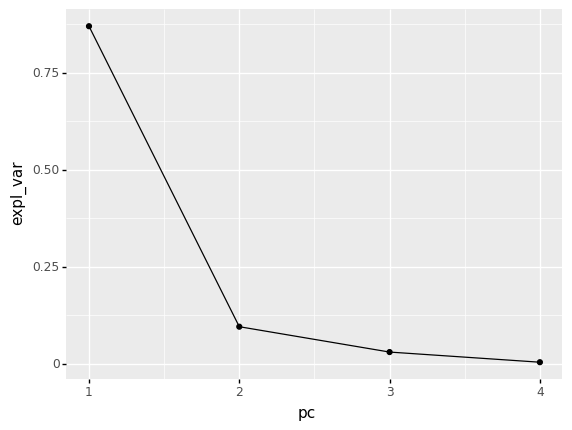

<ggplot: (-9223372036540939916)>
Accuracy Score:  1.0


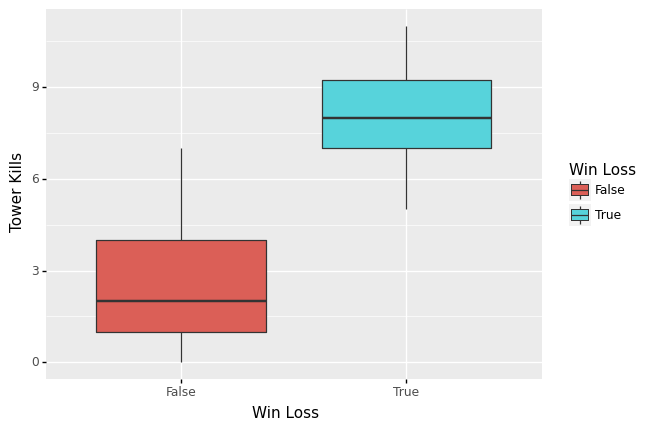

<ggplot: (313842724)>


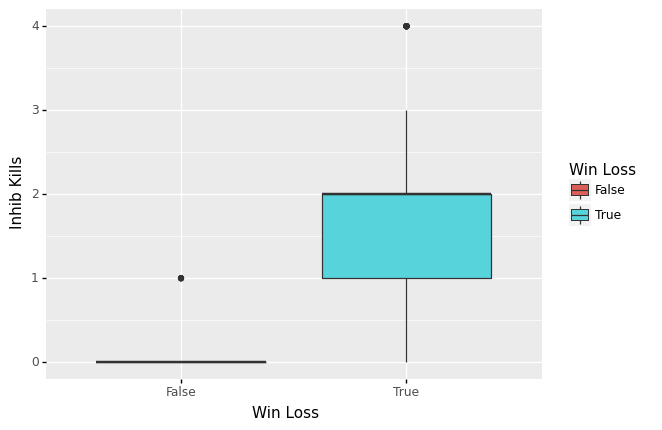

<ggplot: (-9223372036540905875)>


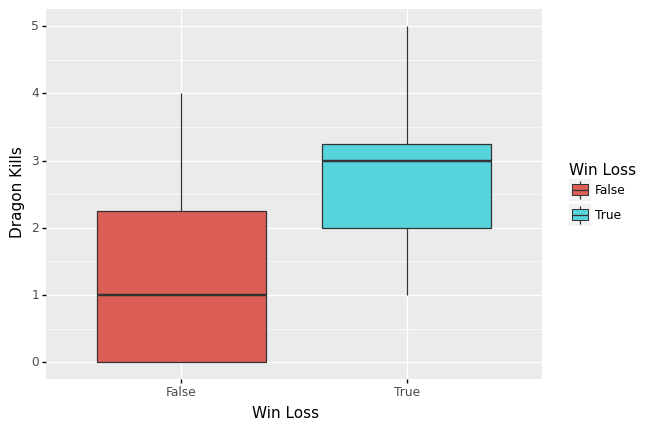

<ggplot: (314663165)>


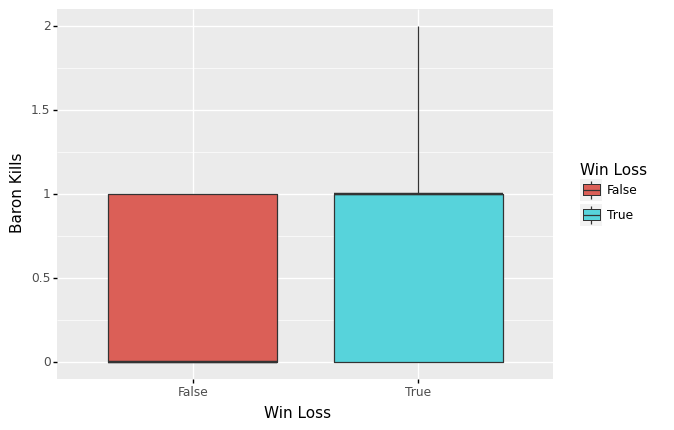

<ggplot: (-9223372036539788316)>


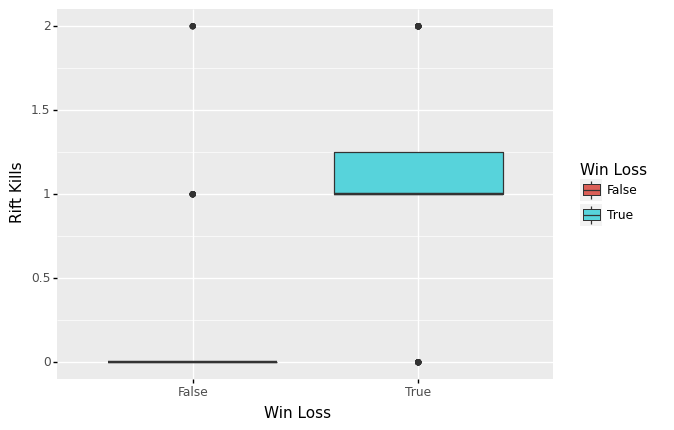

<ggplot: (-9223372036539785486)>


In [8]:
import requests
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix

VisionScores = []
WinLoss = []
GameIDs = []
Kills = []
ChampionID = []
ChampPoints = []
playerID = []
inhibKills =[]
towerKills =[]
dragonKills =[]
baronKills = []
riftKills = []
Wins = []

matchesPulling = 20
    
def requestSummonerData(region, summonerName, APIKey):

    #Create URL and return json file
    
    URL = "https://" + region + ".api.riotgames.com/lol/summoner/v4/summoners/by-name/" + summonerName + "?api_key=" + APIKey
    response = requests.get(URL)
    return response.json()

def requestRankedData(region, ID, APIKey):
    URL = "https://" + region + ".api.riotgames.com/lol/league/v4/entries/by-summoner/" + ID + "?api_key=" + APIKey
    response = requests.get(URL)
    return response.json()
    
def requestMatchHistory(region, ID, APIKey):
    URL = "https://" + region + ".api.riotgames.com/lol/match/v4/matchlists/by-account/" + ID + "?api_key=" + APIKey
    response = requests.get(URL)
    return response.json()

def matchIDs(JSON):
    numGames = JSON['endIndex']-JSON['startIndex']
    for x in range(numGames):
        GameIDs.append(JSON['matches'][x]['gameId'])
    return GameIDs

def requestMatchData(region, matchID, APIKey):
    URL = "https://" + region + ".api.riotgames.com/lol/match/v4/matches/" + str(matchID) + "?api_key=" + APIKey
    response = requests.get(URL)
    return response.json()

def returnScores(JSON):
    for x in range(10):
        results = JSON['participants'][x]['stats']['win']
        WinLoss.append(JSON['participants'][x]['stats']['win']) 
        if results == True:
            Wins.append(1)
        if results == False:
            Wins.append(0)

        
        teamID = JSON['participants'][x]['teamId']
        
        if teamID == JSON['teams'][0]['teamId']:
            inhibKills.append(JSON['teams'][0]['inhibitorKills'])
            towerKills.append(JSON['teams'][0]['towerKills'])
            dragonKills.append(JSON['teams'][0]['dragonKills'])
            baronKills.append(JSON['teams'][0]['baronKills'])
            riftKills.append(JSON['teams'][0]['riftHeraldKills'])
            
        elif teamID == JSON['teams'][1]['teamId']:
            inhibKills.append(JSON['teams'][1]['inhibitorKills'])
            towerKills.append(JSON['teams'][1]['towerKills'])
            dragonKills.append(JSON['teams'][1]['dragonKills'])
            baronKills.append(JSON['teams'][1]['baronKills'])
            riftKills.append(JSON['teams'][1]['riftHeraldKills'])
        
        else:
            print("team not found")
        
    return
    
def main():
    print("Enter your region to get started")
    print("Type in one of the following regions or else the program wont work correctly:\n")
    print("na1 or EUW \n")

    #Ask the user for three things, their region, summoner name, and API Key.

    region = "na1"
    #region = (str)(input('Type in one of the regions above: '))
    summonerName = "OGPoonSlayer"
    #summonerName = (str)(input('Type your Summoner Name here and DO NOT INCLUDE ANY SPACES: '))
    APIKey = "RGAPI-659c5b06-188b-42e1-8d47-b7970b5d91ab"
    #APIKey = (str)(input('Copy and paste your API Key here: '))

    #Input variables into function
    responseJSON  = requestSummonerData(region, summonerName, APIKey)
    
    ID = str(responseJSON['name'])
    encID = str(responseJSON['id'])
    accID = str(responseJSON['accountId'])
    puuid = str(responseJSON['puuid'])
    
    responseJSON1 = requestMatchHistory(region, accID, APIKey)
    
    matchHistory = []
    
    matchHistory = matchIDs(responseJSON1)
    
    for x in range(matchesPulling):
        JSON = requestMatchData(region, matchHistory[x], APIKey)
        returnScores(JSON)
    
    print(WinLoss)
    print(Wins)
    df = pd.DataFrame({"Win Loss" : WinLoss, "Wins" : Wins, "Inhib Kills" : inhibKills, "Tower Kills" : towerKills, 
                       "Dragon Kills" : dragonKills, "Baron Kills" : baronKills, "Rift Kills" : riftKills})
    
    
    feat = df.columns[1:5]
    
    X = df[feat]
    y = df['Win Loss']
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
    z = StandardScaler()
    
    X_train[feat] = z.fit_transform(X_train[feat])
    X_test[feat] = z.fit_transform(X_test[feat])
    

    las = Lasso()
    las.fit(X_train,y_train)
    
    
    print("Train: ", mean_absolute_error(y_train, las.predict(X_train)))
    print("Test: ", mean_absolute_error(y_test, las.predict(X_test)))
    
    
    pca = PCA()
    pca.fit(df[feat])
    
    pcaDF = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_, "pc" : range(1,5), "cum_var" : pca.explained_variance_ratio_.cumsum()})
    
    print(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) +geom_point()+geom_line())
    
    logModel = LogisticRegression()
    
    model = logModel.fit(X_train, y_train)
    
    print("Accuracy Score: ", accuracy_score(y_test, model.predict(X_test)))
    
    print((ggplot(df, aes(x = 'Win Loss', y = 'Tower Kills', fill = 'Win Loss')) + geom_boxplot()))
    print((ggplot(df, aes(x = 'Win Loss', y = 'Inhib Kills', fill = 'Win Loss')) + geom_boxplot()))
    print((ggplot(df, aes(x = 'Win Loss', y = 'Dragon Kills', fill = 'Win Loss')) + geom_boxplot()))
    print((ggplot(df, aes(x = 'Win Loss', y = 'Baron Kills', fill = 'Win Loss')) + geom_boxplot()))
    print((ggplot(df, aes(x = 'Win Loss', y = 'Rift Kills', fill = 'Win Loss')) + geom_boxplot()))
    
if __name__ == "__main__":
    main()

3. Based on in game events like inhibitor kills, tower kills, dragon kills, baron kills, champion kills, and rift herald kills, are we able to predict if an individual is more likely to win a game?

I'd say you can definitely predict if an individual is going to win based off these different kill statistics. I'd say the least relevant variable is rift kills looking at the boxplots I made. All the other variables have significant differences in them when looking at losing versus winning teams. The LASSO technique shows that my model is applicable to general data too because the training and test scores are very similar. Also, the accuracy score for my multiple regression model is very high.  